In [9]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
# sometimes order maters on these
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import oBehave.plotting_stuff as obps
import oBehave.helperfunctions as obhf
import oBehave.neural_analysis as obna
import oBehave.behavior_anaylsis as obba
import sklearn.decomposition as decomp


from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.utilities import get_trace_around_timepoint,get_nearest_frame
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

experiment_id = 639438856


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load all the data we will want for this
manifest = obhf.load_manifest()
obba.includeNovelSession(manifest)
dataset= VisualBehaviorOphysDataset(experiment_id=experiment_id, cache_dir=obhf.drive_path)
#analysis = ResponseAnalysis(dataset)

In [ ]:
manifest.first_session

In [ ]:
def compute_lifetime_sparseness(image_responses):
    # image responses should be an array of the trial averaged responses to each image
    # sparseness = 1-(sum of trial averaged responses to images / N)squared / (sum of (squared mean responses / n)) / (1-(1/N))
    # N = number of images
    # Modified shamelessly from allen institute code
    N = float(len(image_responses))
    ls = ((1-(1/N) * ((np.power(np.abs(image_responses).sum(axis=0),2)) / (np.power(image_responses,2).sum(axis=0)))) / (1-(1/N)))
    return ls


keylist = ['experiment_id','cell_indices','cell_specimen_ids','session_type','cre_line',
           'SparAve','Spar1','Spar2','Spar3','Spar4','Spar5','Shit','Smiss']
cr = {k:[] for k in keylist}
for ex,row in manifest.iterrows():
    if not row['first_session']:
        continue
    print(row['experiment_id'])
    dataset= VisualBehaviorOphysDataset(experiment_id=row['experiment_id'], cache_dir=obhf.drive_path)
    analysis = ResponseAnalysis(dataset)
    FR = obba.includeAddRepeats(analysis.flash_response_df,dataset.all_trials)
    unique_cells = np.unique(FR['cell'])
    unique_images = np.unique(FR['image_name'])
    for ii in unique_cells:
        cr['experiment_id'].append(row['experiment_id'])
        cr['cell_indices'].append(dataset.cell_indices[ii])
        cr['cell_specimen_ids'].append(dataset.cell_specimen_ids[ii])
        cr['cre_line'].append(row['cre_line'])
        cr['session_type'].append(row['session_type'])
        im_means = [FR[(FR['image_name']==image)&( FR['cell']==ii)].mean_response.mean() for image in np.unique(FR['image_name'])]
        cr['SparAve'].append(compute_lifetime_sparseness(im_means))
        for rr in [1,2,3,4,5]:
            im_means = [FR[(FR['image_name']==image)&(FR['cell']==ii)&(FR['repeats']==rr)].mean_response.mean() for image in np.unique(FR['image_name'])]
            cr['Spar'+str(rr)].append(compute_lifetime_sparseness(im_means))
        im_means = [FR[(FR['image_name']==image)&( FR['cell']==ii)&(FR['repeats']==1)&(FR['response_type']=='HIT')].mean_response.mean() for image in np.unique(FR['image_name'])]
        cr['Shit'].append(compute_lifetime_sparseness(im_means))
        im_means = [FR[(FR['image_name']==image)&( FR['cell']==ii)&(FR['repeats']==1)&(FR['response_type']=='MISS')].mean_response.mean() for image in np.unique(FR['image_name'])]
        cr['Smiss'].append(compute_lifetime_sparseness(im_means))    
CellResp = pd.DataFrame(cr)

644942849
loading trial response dataframe
loading flash response dataframe
645035903
loading trial response dataframe
loading flash response dataframe
645086795
loading trial response dataframe
loading flash response dataframe
645362806
loading trial response dataframe
loading flash response dataframe
646922970
loading trial response dataframe
loading flash response dataframe
647108734
loading trial response dataframe
loading flash response dataframe
647551128
loading trial response dataframe
loading flash response dataframe
647887770
loading trial response dataframe
loading flash response dataframe
652844352
loading trial response dataframe
loading flash response dataframe
653053906
loading trial response dataframe
loading flash response dataframe
653123781
loading trial response dataframe
loading flash response dataframe
639253368
loading trial response dataframe
loading flash response dataframe
639438856
loading trial response dataframe
loading flash response dataframe
639769395
lo

In [ ]:

CellResp.to_pickle('./popMeanResponseSelectivity.pkl')
#CellResp.to_hdf('./popMeanResponseSelectivity.hdf5')

(array([ 0.07272727,  0.23356643,  0.41538462,  0.61258741,  0.74825175,
         0.82237762,  0.87972028,  0.92027972,  0.96923077,  1.        ]),
 array([ 0.02169813,  0.1167459 ,  0.21179367,  0.30684144,  0.40188921,
         0.49693698,  0.59198476,  0.68703253,  0.7820803 ,  0.87712807,
         0.97217584]),
 <a list of 1 Patch objects>)

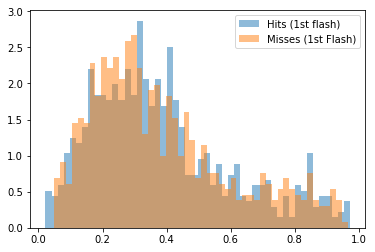

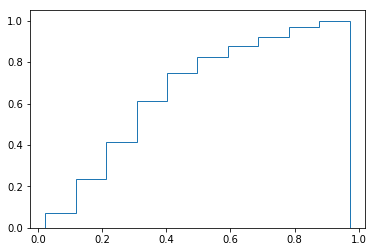

In [139]:
plt.hist(CellResp['Shit'][np.isfinite(CellResp['Shit'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type']=='behavior_session_A')],bins = 50,alpha = .5,normed = True);
plt.hist(CellResp['Smiss'][np.isfinite(CellResp['Smiss'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type'] == 'behavior_session_A')],bins = 50,alpha = .5,normed = True);
plt.legend(['Hits (1st flash)','Misses (1st Flash)'])
plt.figure()
plt.hist(CellResp['Shit'][np.isfinite(CellResp['Shit'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type']=='behavior_session_A')],histtype='step',normed=True,cumulative=True)
#plt.hist(CellResp['Spar2'][np.isfinite(CellResp['Spar2'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type'] == 'behavior_session_B')],bins = 50,alpha = .5,normed = True);

#plt.hist(CellResp['Spar2'][np.isfinite(CellResp['Spar2'])&(CellResp['cre_line']=='Vip-IRES-Cre')&(CellResp['session_type']=='behavior_session_A')],bins = 20,alpha = .5,normed = True);
#plt.hist(CellResp['Spar2'][np.isfinite(CellResp['Spar2'])&(CellResp['cre_line']=='Vip-IRES-Cre')&(CellResp['session_type'] == 'behavior_session_C')],bins = 20,alpha = .5,normed = True);
#sp.stats.ks_2samp(CellResp['SparAve'][np.isfinite(CellResp['SparAve'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type']=='behavior_session_A')],
#                  CellResp['SparAve'][np.isfinite(CellResp['SparAve'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type'] == 'behavior_session_D')])


In [74]:
CellResp.head()

,Shit,Smiss,Spar1,Spar2,Spar3,Spar4,Spar5,SparAve,cell_indices,cell_specimen_ids,cre_line,experiment_id,session_type
0,0.140308,0.158886,0.100232,0.093731,0.351235,0.385797,0.424650,0.380403,0,644947394,Vip-IRES-Cre,644942849,behavior_session_A
1,0.306354,0.233874,0.255760,0.224870,0.209784,0.341914,0.411547,0.391935,1,644947396,Vip-IRES-Cre,644942849,behavior_session_A
2,0.171111,0.324753,0.093052,0.219392,0.348873,0.349687,0.327377,0.205154,2,644947398,Vip-IRES-Cre,644942849,behavior_session_A
3,0.168797,0.316684,0.122535,0.415258,0.493262,0.461351,0.467547,0.333468,3,644947404,Vip-IRES-Cre,644942849,behavior_session_A
4,0.266082,0.232349,0.032664,0.236135,0.138776,0.163166,0.258577,0.354480,4,644947410,Vip-IRES-Cre,644942849,behavior_session_A


In [222]:
def ecdf(data,plotme = True,ax = None,lineopts={'linestyle':'-','marker':'.'}):
    if ax is None:
        ax = plt.gca()
    data = np.array(data)# Just in case
    data = data[np.isfinite(data)]
    cdfx = np.sort(np.unique(data[np.isfinite(data)]))
    yval = np.zeros(cdfx.shape)
    for ii,xx in enumerate(cdfx):
        yval[ii] = float(len(data[data<xx]))/float(len(data))
    if plotme:
        ax.plot(cdfx,yval,**lineopts)
    return cdfx,yval

#ecdf(CellResp['Spar1'].values);
ecdf(CellResp['SparAve'][np.isfinite(CellResp['SparAve'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type']=='behavior_session_A')].values);
ecdf(CellResp['SparAve'][np.isfinite(CellResp['SparAve'])&(CellResp['cre_line']=='Slc17a7-IRES2-Cre')&(CellResp['session_type']=='behavior_session_B')].values);

#ecdf(CellResp[]['SparAve'].values)
#ecdf(CellResp['Spar2'].values);
#ecdf(CellResp['Spar3'].values);
#ecdf(CellResp['Spar4'].values);
#ecdf(CellResp['Spar5'].values);


TypeError: ecdf() got an unexpected keyword argument 'linestyle'

Text(0.5,0,'Sparsity')

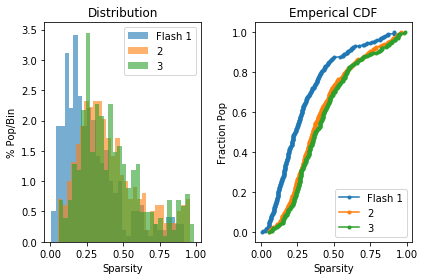

In [271]:
CR = CellResp.copy()
CR = CR.merge(manifest,left_on='experiment_id',right_on='experiment_id',how='left')
# plt.figure()
# ecdf(CR['SparAve'][np.isfinite(CR['SparAve'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y']=='behavior_session_A')&(CR['targeted_structure']=='VISp')].values);
# ecdf(CR['SparAve'][np.isfinite(CR['SparAve'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y']=='behavior_session_A')&(CR['targeted_structure']=='VISal')].values);
# plt.legend(['VISp','VISal'])

fig = plt.figure(tight_layout = True)
axes = fig.subplots(1,2)
axes[0].hist(CR['Spar1'][np.isfinite(CR['Spar1'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y']=='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,bins =30,normed = True,alpha = .6)
axes[0].hist(CR['Spar2'][np.isfinite(CR['Spar2'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y'] =='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,bins =30,normed = True,alpha = .6)
axes[0].hist(CR['Spar3'][np.isfinite(CR['Spar3'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y'] =='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,bins =30,normed = True,alpha = .6)
axes[0].legend(['Flash 1','2','3'])
axes[0].set_title('Distribution')
axes[0].set_ylabel('% Pop/Bin')
axes[0].set_xlabel('Sparsity')

ecdf(CR['Spar1'][np.isfinite(CR['Spar1'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y']=='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,ax = axes[1]);
ecdf(CR['Spar2'][np.isfinite(CR['Spar2'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y'] =='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,ax = axes[1]);
ecdf(CR['Spar3'][np.isfinite(CR['Spar2'])&(CR['cre_line_x']=='Slc17a7-IRES2-Cre')&(CR['session_type_y'] =='behavior_session_A')&(CR['targeted_structure']=='VISp')].values,ax = axes[1]);
axes[1].legend(['Flash 1','2','3'])
axes[1].set_title('Emperical CDF')
axes[1].set_ylabel('Fraction Pop')
axes[1].set_xlabel('Sparsity')





In [240]:
any(~CR.first_session.values)

False